![trainers in a store](trainers.jpg)

Sports clothing and athleisure attire is a huge industry, worth approximately [$193 billion in 2021](https://www.statista.com/statistics/254489/total-revenue-of-the-global-sports-apparel-market/) with a strong growth forecast over the next decade! 

In this notebook, you will undertake the role of a product analyst for an online sports clothing company. The company is specifically interested in how it can improve revenue. You will dive into product data such as pricing, reviews, descriptions, and ratings, as well as revenue and website traffic, to produce recommendations for its marketing and sales teams.  

You've been provided with five datasets to investigate:
* `info.csv`
* `finance.csv`
* `reviews.csv`
* `traffic.csv`
* `brands.csv`

The company has asked you to answer the following questions:

## What is the volume of products and average revenue for Adidas and Nike products based on price quartiles?

* Label products priced up to quartile one as `"Budget"`, quartile 2 as `"Average"`, quartile 3 as `"Expensive"`, and quartile 4 as `"Elite"`.
* Store as a `pandas` DataFrame called `adidas_vs_nike` containing the following columns: `"brand"`, `"price_label"`, `"num_products"`, and `"mean_revenue"`.

## Do any differences exist between the word count of a product's description and its mean rating?

* Store the results as a `pandas` DataFrame called `description_lengths` containing the following columns: `"description_length"`, `"mean_rating"`, `"num_reviews"`.

## How does the volume of products and median revenue vary between clothing and footwear?

* **Create** a `pandas` DataFrame called `product_types` containing the following columns: `"num_clothing_products"`, `"median_clothing_revenue"`, `"num_footwear_products"`, `"median_footwear_revenue"`.

In [1]:
# Start coding here... 
import pandas as pd
import numpy as np

In [2]:
info=pd.read_csv("info.csv")
info

,product_name,product_id,description
0,NaN,AH2430,NaN
1,Women's adidas Originals Sleek Shoes,G27341,"A modern take on adidas sport heritage, tailor..."
2,Women's adidas Swim Puka Slippers,CM0081,These adidas Puka slippers for women's come wi...
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,"Inspired by modern tech runners, these women's..."
4,Women's adidas Originals Taekwondo Shoes,D98205,This design is inspired by vintage Taekwondo s...
...,...,...,...
3174,Nike Tiempo Legend 8 Academy TF,AT6100-606,The Nike Tiempo Legend 8 Academy TF takes the ...
3175,Nike React Metcon AMP,CT9155-063,The Nike React Metcon AMP takes the stability ...
3176,Air Jordan 8 Retro,CI1236-100,The Air Jordan 8 Retro recaptures the memorabl...
3177,Nike Air Max 98,AH6799-300,The Nike Air Max 98 features the OG design lin...


In [3]:
info.isna().sum()

product_name    59
product_id       0
description     62
dtype: int64

In [4]:
finance=pd.read_csv("finance.csv")
finance

,product_id,listing_price,sale_price,discount,revenue
0,AH2430,NaN,NaN,NaN,NaN
1,G27341,75.99,37.99,0.5,1641.17
2,CM0081,9.99,5.99,0.4,398.93
3,B44832,69.99,34.99,0.5,2204.37
4,D98205,79.99,39.99,0.5,5182.70
...,...,...,...,...,...
3174,AT6100-606,0.00,64.95,0.0,0.00
3175,CT9155-063,0.00,139.95,0.0,251.91
3176,CI1236-100,159.95,127.97,0.0,230.35
3177,AH6799-300,0.00,169.95,0.0,1223.64


In [5]:
finance.isna().sum()

product_id        0
listing_price    59
sale_price       59
discount         59
revenue          59
dtype: int64

In [6]:
reviews=pd.read_csv("reviews.csv")
reviews

,product_id,rating,reviews
0,AH2430,NaN,NaN
1,G27341,3.3,24.0
2,CM0081,2.6,37.0
3,B44832,4.1,35.0
4,D98205,3.5,72.0
...,...,...,...
3174,AT6100-606,0.0,0.0
3175,CT9155-063,3.0,1.0
3176,CI1236-100,5.0,1.0
3177,AH6799-300,4.0,4.0


In [7]:
reviews.isna().sum()

product_id     0
rating        59
reviews       59
dtype: int64

In [8]:
traffic=pd.read_csv("traffic.csv")
traffic

,product_id,last_visited
0,AH2430,2018-05-19 15:13:00
1,G27341,2018-11-29 16:16:00
2,CM0081,2018-02-01 10:27:00
3,B44832,2018-09-07 20:06:00
4,D98205,2019-07-18 15:26:00
...,...,...
3174,AT6100-606,NaN
3175,CT9155-063,2019-02-08 18:40:00
3176,CI1236-100,2020-02-19 21:44:00
3177,AH6799-300,2018-02-28 07:37:00


In [9]:
traffic.isna().sum()

product_id        0
last_visited    251
dtype: int64

In [10]:
brands=pd.read_csv("brands.csv")
brands

,product_id,brand
0,AH2430,NaN
1,G27341,Adidas
2,CM0081,Adidas
3,B44832,Adidas
4,D98205,Adidas
...,...,...
3174,AT6100-606,Nike
3175,CT9155-063,Nike
3176,CI1236-100,Nike
3177,AH6799-300,Nike


In [11]:
brands.isna().sum()

product_id     0
brand         59
dtype: int64

In [12]:
a=pd.merge(info,finance,on="product_id",how="inner")
b=pd.merge(a,reviews,on="product_id",how="inner")
c=pd.merge(b,traffic,on="product_id",how="inner")
df=pd.merge(c,brands,on="product_id",how="inner")
df

,product_name,product_id,description,listing_price,sale_price,discount,revenue,rating,reviews,last_visited,brand
0,NaN,AH2430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-19 15:13:00,NaN
1,Women's adidas Originals Sleek Shoes,G27341,"A modern take on adidas sport heritage, tailor...",75.99,37.99,0.5,1641.17,3.3,24.0,2018-11-29 16:16:00,Adidas
2,Women's adidas Swim Puka Slippers,CM0081,These adidas Puka slippers for women's come wi...,9.99,5.99,0.4,398.93,2.6,37.0,2018-02-01 10:27:00,Adidas
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,"Inspired by modern tech runners, these women's...",69.99,34.99,0.5,2204.37,4.1,35.0,2018-09-07 20:06:00,Adidas
4,Women's adidas Originals Taekwondo Shoes,D98205,This design is inspired by vintage Taekwondo s...,79.99,39.99,0.5,5182.70,3.5,72.0,2019-07-18 15:26:00,Adidas
...,...,...,...,...,...,...,...,...,...,...,...
3174,Nike Tiempo Legend 8 Academy TF,AT6100-606,The Nike Tiempo Legend 8 Academy TF takes the ...,0.00,64.95,0.0,0.00,0.0,0.0,NaN,Nike
3175,Nike React Metcon AMP,CT9155-063,The Nike React Metcon AMP takes the stability ...,0.00,139.95,0.0,251.91,3.0,1.0,2019-02-08 18:40:00,Nike
3176,Air Jordan 8 Retro,CI1236-100,The Air Jordan 8 Retro recaptures the memorabl...,159.95,127.97,0.0,230.35,5.0,1.0,2020-02-19 21:44:00,Nike
3177,Nike Air Max 98,AH6799-300,The Nike Air Max 98 features the OG design lin...,0.00,169.95,0.0,1223.64,4.0,4.0,2018-02-28 07:37:00,Nike


## What is the volume of products and average revenue for Adidas and Nike products based on price quartiles?

* Label products priced up to quartile one as `"Budget"`, quartile 2 as `"Average"`, quartile 3 as `"Expensive"`, and quartile 4 as `"Elite"`.
* Store as a `pandas` DataFrame called `adidas_vs_nike` containing the following columns: `"brand"`, `"price_label"`, `"num_products"`, and `"mean_revenue"`.

In [13]:
df.columns

Index(['product_name', 'product_id', 'description', 'listing_price',
       'sale_price', 'discount', 'revenue', 'rating', 'reviews',
       'last_visited', 'brand'],
      dtype='object')

In [14]:
df["sale_price"].describe()

count    3120.000000
mean       60.103035
std        41.906852
min         4.490000
25%        29.990000
50%        45.990000
75%        77.990000
max       365.000000
Name: sale_price, dtype: float64

In [15]:
def func(x):
    m=x["sale_price"].mean()
    if m<=29.99:
        return "Budget"
    elif m>29.99 and m<=45.99:
        return "Average"
    elif m>45.99 and m<=79.99:
        return "Expensive"
    elif m>79.99:
        return "Elite"
    

In [16]:
l=[]
for i,j in df.groupby("brand"):
    d={}
    d["brand"]=i
    d["price_label"]=func(j)
    d["num_products"]=len(j)
    d["mean_revenue"]=j["revenue"].mean()
    l.append(d)
l

[{'brand': 'Adidas',
  'price_label': 'Expensive',
  'num_products': 2575,
  'mean_revenue': 4476.356924271845},
 {'brand': 'Nike',
  'price_label': 'Elite',
  'num_products': 545,
  'mean_revenue': 1472.079376146789}]

In [17]:
adidas_vs_nike=pd.DataFrame(l)
adidas_vs_nike

,brand,price_label,num_products,mean_revenue
0,Adidas,Expensive,2575,4476.356924
1,Nike,Elite,545,1472.079376


## Do any differences exist between the word count of a product's description and its mean rating?

* Store the results as a `pandas` DataFrame called `description_lengths` containing the following columns: `"description_length"`, `"mean_rating"`, `"num_reviews"`.

In [18]:
len('A modern take on adidas sport heritage, tailored just for women. Perforated 3-Stripes on the leather upper of these shoes offer a sleek look that mirrors iconic tennis styles.'.split())

29

In [19]:
df.loc[1]["description"]

'A modern take on adidas sport heritage, tailored just for women. Perforated 3-Stripes on the leather upper of these shoes offer a sleek look that mirrors iconic tennis styles.'

In [20]:
df

,product_name,product_id,description,listing_price,sale_price,discount,revenue,rating,reviews,last_visited,brand
0,NaN,AH2430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-19 15:13:00,NaN
1,Women's adidas Originals Sleek Shoes,G27341,"A modern take on adidas sport heritage, tailor...",75.99,37.99,0.5,1641.17,3.3,24.0,2018-11-29 16:16:00,Adidas
2,Women's adidas Swim Puka Slippers,CM0081,These adidas Puka slippers for women's come wi...,9.99,5.99,0.4,398.93,2.6,37.0,2018-02-01 10:27:00,Adidas
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,"Inspired by modern tech runners, these women's...",69.99,34.99,0.5,2204.37,4.1,35.0,2018-09-07 20:06:00,Adidas
4,Women's adidas Originals Taekwondo Shoes,D98205,This design is inspired by vintage Taekwondo s...,79.99,39.99,0.5,5182.70,3.5,72.0,2019-07-18 15:26:00,Adidas
...,...,...,...,...,...,...,...,...,...,...,...
3174,Nike Tiempo Legend 8 Academy TF,AT6100-606,The Nike Tiempo Legend 8 Academy TF takes the ...,0.00,64.95,0.0,0.00,0.0,0.0,NaN,Nike
3175,Nike React Metcon AMP,CT9155-063,The Nike React Metcon AMP takes the stability ...,0.00,139.95,0.0,251.91,3.0,1.0,2019-02-08 18:40:00,Nike
3176,Air Jordan 8 Retro,CI1236-100,The Air Jordan 8 Retro recaptures the memorabl...,159.95,127.97,0.0,230.35,5.0,1.0,2020-02-19 21:44:00,Nike
3177,Nike Air Max 98,AH6799-300,The Nike Air Max 98 features the OG design lin...,0.00,169.95,0.0,1223.64,4.0,4.0,2018-02-28 07:37:00,Nike


In [21]:
df["product_id"].value_counts()

AH2430        1
B41529        1
B37727        1
AQ1022        1
D96745        1
             ..
F35515        1
F35615        1
CK9466        1
F36650        1
CJ9585-600    1
Name: product_id, Length: 3179, dtype: int64

In [22]:
description_lengths=pd.DataFrame()

In [23]:
description_lengths[['mean_rating','num_reviews']]=df[["rating","reviews"]]
description_lengths

,mean_rating,num_reviews
0,NaN,NaN
1,3.3,24.0
2,2.6,37.0
3,4.1,35.0
4,3.5,72.0
...,...,...
3174,0.0,0.0
3175,3.0,1.0
3176,5.0,1.0
3177,4.0,4.0


In [24]:
df["description"].isna().sum()

62

In [25]:
description_lengths["description_length"]=df["description"].apply(lambda x: np.nan if type(x)==float else len(x.split()))

In [26]:
description_lengths

,mean_rating,num_reviews,description_length
0,NaN,NaN,NaN
1,3.3,24.0,29.0
2,2.6,37.0,28.0
3,4.1,35.0,41.0
4,3.5,72.0,46.0
...,...,...,...
3174,0.0,0.0,23.0
3175,3.0,1.0,62.0
3176,5.0,1.0,36.0
3177,4.0,4.0,44.0


In [27]:
import seaborn as sns

<Axes: xlabel='description_length', ylabel='mean_rating'>

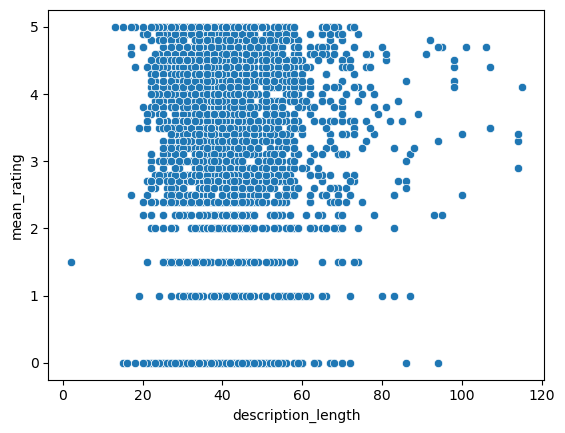

In [28]:
sns.scatterplot(data=description_lengths,x="description_length",y="mean_rating")

## How does the volume of products and median revenue vary between clothing and footwear?

* **Create** a `pandas` DataFrame called `product_types` containing the following columns: `"num_clothing_products"`, `"median_clothing_revenue"`, `"num_footwear_products"`, `"median_footwear_revenue"`.

In [29]:
df

,product_name,product_id,description,listing_price,sale_price,discount,revenue,rating,reviews,last_visited,brand
0,NaN,AH2430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-19 15:13:00,NaN
1,Women's adidas Originals Sleek Shoes,G27341,"A modern take on adidas sport heritage, tailor...",75.99,37.99,0.5,1641.17,3.3,24.0,2018-11-29 16:16:00,Adidas
2,Women's adidas Swim Puka Slippers,CM0081,These adidas Puka slippers for women's come wi...,9.99,5.99,0.4,398.93,2.6,37.0,2018-02-01 10:27:00,Adidas
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,"Inspired by modern tech runners, these women's...",69.99,34.99,0.5,2204.37,4.1,35.0,2018-09-07 20:06:00,Adidas
4,Women's adidas Originals Taekwondo Shoes,D98205,This design is inspired by vintage Taekwondo s...,79.99,39.99,0.5,5182.70,3.5,72.0,2019-07-18 15:26:00,Adidas
...,...,...,...,...,...,...,...,...,...,...,...
3174,Nike Tiempo Legend 8 Academy TF,AT6100-606,The Nike Tiempo Legend 8 Academy TF takes the ...,0.00,64.95,0.0,0.00,0.0,0.0,NaN,Nike
3175,Nike React Metcon AMP,CT9155-063,The Nike React Metcon AMP takes the stability ...,0.00,139.95,0.0,251.91,3.0,1.0,2019-02-08 18:40:00,Nike
3176,Air Jordan 8 Retro,CI1236-100,The Air Jordan 8 Retro recaptures the memorabl...,159.95,127.97,0.0,230.35,5.0,1.0,2020-02-19 21:44:00,Nike
3177,Nike Air Max 98,AH6799-300,The Nike Air Max 98 features the OG design lin...,0.00,169.95,0.0,1223.64,4.0,4.0,2018-02-28 07:37:00,Nike


In [30]:
info.csv
finance.csv
reviews.csv
traffic.csv
brands.csv

AttributeError: 'DataFrame' object has no attribute 'csv'

In [31]:
df["product_name"].sample(50)

535         Women's adidas Originals Deerupt Runner Shoes
3078                          Nike Air Zoom Terra Kiger 6
1281           Men's Sports Inspired Lite Racer 2.0 Shoes
1056                MEN'S ADIDAS RUNNING ERDIGA 3.0 SHOES
1165     Men's adidas Sport Inspired Astro Lite 2.0 Shoes
2276    MEN'S ADIDAS FOOTBALL PREDATOR TANGO 18.1 TRAI...
765        Women's adidas Sports Inspired Daily 2.0 Shoes
626     Women's adidas Originals Superstar Metal Toe S...
102              Men's adidas Outdoor Terra Light Sandals
634                 Women's adidas Originals NMD_R1 Shoes
3103                                     Nike Free RN 5.0
962                  Women's adidas Originals Sleek Shoes
1619                  Women's Running Ultraboost 20 Shoes
2759                                      Nike MX-720-818
1937                    Men's adidas Outdoor Echo Sandals
1675         MEN'S ADIDAS SPORT INSPIRED LITE RACER SHOES
1645         Men's adidas Originals 424 SC Premiere Shoes
2669          

In [32]:
len(df)

3179

In [33]:
df.sample(100).iloc[2]["description"]

"adidas teamed up with Pharrell Williams to create these running shoes that celebrate the world's many vibrant hues. They have a breathable textile upper and responsive cushioning for an energized ride. A stability rail helps guide the foot through the gait cycle."

In [34]:
a=df[(df["description"].str.contains("slippers")==True) | (df["description"].str.contains("shoes")==True) | (df["description"].str.contains("SHOES")==True) | (df["description"].str.contains("Shoes")==True) |(df["product_name"].str.contains("shoes")==True) | (df["product_name"].str.contains("SHOES")==True) | (df["product_name"].str.contains("Shoes")==True)]
a

,product_name,product_id,description,listing_price,sale_price,discount,revenue,rating,reviews,last_visited,brand
1,Women's adidas Originals Sleek Shoes,G27341,"A modern take on adidas sport heritage, tailor...",75.99,37.99,0.5,1641.17,3.3,24.0,2018-11-29 16:16:00,Adidas
2,Women's adidas Swim Puka Slippers,CM0081,These adidas Puka slippers for women's come wi...,9.99,5.99,0.4,398.93,2.6,37.0,2018-02-01 10:27:00,Adidas
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,"Inspired by modern tech runners, these women's...",69.99,34.99,0.5,2204.37,4.1,35.0,2018-09-07 20:06:00,Adidas
4,Women's adidas Originals Taekwondo Shoes,D98205,This design is inspired by vintage Taekwondo s...,79.99,39.99,0.5,5182.70,3.5,72.0,2019-07-18 15:26:00,Adidas
5,Women's adidas Sport Inspired Duramo Lite 2.0 ...,B75586,Refine your interval training in these women's...,47.99,19.20,0.6,1555.20,1.0,45.0,2019-01-30 12:09:00,Adidas
...,...,...,...,...,...,...,...,...,...,...,...
2934,Nike EXP-X14 SE,AO3095-100,Drawing inspiration from Nike running shoes su...,0.00,119.95,0.0,431.82,5.0,2.0,2020-01-04 21:03:00,Nike
2959,Nike Drop-Type Premium,CN6916-100,The Nike Drop-Type Premium is inspired by clas...,0.00,69.95,0.0,755.46,4.0,6.0,2019-11-07 01:35:00,Nike
3062,Nike x Olivia Kim Air Mowabb,CK3312-001,"Celebrate the '90s, the great outdoors and get...",159.95,111.97,0.0,0.00,0.0,0.0,2019-08-21 10:30:00,Nike
3137,Nike Drop-Type,CQ0989-002,With DIY attitude and classic tennis shoe appe...,0.00,59.95,0.0,107.91,4.0,1.0,2018-10-22 11:52:00,Nike


In [35]:
df.drop(a.index, axis=0).sample(50).iloc[1]["description"]

'A modern take on heritage post-sport slides. These slides have a super-soft midsole with massage nubs in the footbed and firm support in the toe area. The adjustable upper is made of quick-drying material, while the classic 3-Stripes show off adidas pride.'

In [36]:
2352+827

3179

In [37]:
"shoe" in "women's adidas originals sleek shoes"

True

In [38]:
" ".join([i.lower() for i in "Women's adidas Originals Sleek Shoes".split()])

"women's adidas originals sleek shoes"

In [39]:
"shoes" in [i.lower() for i in "Women's adidas Originals Sleek Shoes".split()]

True

In [40]:
"flops" in "Flip-Flops".lower()

True

In [41]:
def func(x):
    if type(x["product_name"])==float or type(x["description"])==float:
        return
    elif "shoe" in " ".join([i.lower() for i in x["product_name"].split()]):
        return "footwear"
    elif "shoe" in  " ".join([i.lower() for i in x["description"].split()]):
        return "footwear"
    elif "sandals" in " ".join([i.lower() for i in x["product_name"].split()]):
        return "footwear"
    elif "sandals" in  " ".join([i.lower() for i in x["description"].split()]):
        return "footwear"
    elif "slippers" in " ".join([i.lower() for i in x["product_name"].split()]):
        return "footwear"
    elif "slippers" in  " ".join([i.lower() for i in x["description"].split()]):
        return "footwear"
    elif "flop" in " ".join([i.lower() for i in x["product_name"].split()]):
        return "footwear"
    elif "flop" in  " ".join([i.lower() for i in x["description"].split()]):
        return "footwear"
    elif "boot" in " ".join([i.lower() for i in x["product_name"].split()]):
        return "footwear"
    elif "boot" in  " ".join([i.lower() for i in x["description"].split()]):
        return "footwear"
    elif "sandal" in " ".join([i.lower() for i in x["product_name"].split()]):
        return "footwear"
    elif "sandal" in  " ".join([i.lower() for i in x["description"].split()]):
        return "footwear"
    elif "foot" in " ".join([i.lower() for i in x["product_name"].split()]):
        return "footwear"
    elif "foot" in  " ".join([i.lower() for i in x["description"].split()]):
        return "footwear"
    else:
        return "clothing"
    

In [42]:
l=[]
for i in range(len(df)):
    l.append(func(df.iloc[i]))

In [44]:
l.count("footwear")

2821

In [45]:
len(df)

3179

In [46]:
df["footwear/clothing"]=l

In [48]:
df[df["footwear/clothing"]=="clothing"]

,product_name,product_id,description,listing_price,sale_price,discount,revenue,rating,reviews,last_visited,brand,footwear/clothing
1246,Women's adidas Originals Adilette Slides,EG5006,Keep it casual. These Adilette Slides are all ...,35.99,35.99,0.0,1619.55,3.8,25.0,2018-05-22 14:19:00,Adidas,clothing
1250,Women's adidas Originals Adilette Slides,EG5005,Keep it casual. These Adilette Slides are all ...,35.99,35.99,0.0,1425.20,4.1,22.0,NaN,Adidas,clothing
1388,Women's adidas Originals Adilette Slides,EE4851,The classic off-the-clock slide gets a feminin...,39.99,23.99,0.4,129.55,4.2,3.0,2018-01-12 21:43:00,Adidas,clothing
1460,Women's adidas Originals Adilette Slides,EE7449,"Channeling '70s leisurewear looks, this versio...",39.99,23.99,0.4,2245.46,1.0,52.0,2019-09-12 17:04:00,Adidas,clothing
1557,NAHA,CK9784,No description,59.99,29.99,0.5,1025.66,1.5,19.0,2019-05-11 13:27:00,Adidas,clothing
...,...,...,...,...,...,...,...,...,...,...,...,...
3172,Nike Zoom Pegasus Turbo 2 Special Edition,BV7757-500,The Nike Zoom Pegasus Turbo 2 is updated with ...,159.95,127.97,0.0,230.35,5.0,1.0,2019-02-22 17:06:00,Nike,clothing
3174,Nike Tiempo Legend 8 Academy TF,AT6100-606,The Nike Tiempo Legend 8 Academy TF takes the ...,0.00,64.95,0.0,0.00,0.0,0.0,NaN,Nike,clothing
3176,Air Jordan 8 Retro,CI1236-100,The Air Jordan 8 Retro recaptures the memorabl...,159.95,127.97,0.0,230.35,5.0,1.0,2020-02-19 21:44:00,Nike,clothing
3177,Nike Air Max 98,AH6799-300,The Nike Air Max 98 features the OG design lin...,0.00,169.95,0.0,1223.64,4.0,4.0,2018-02-28 07:37:00,Nike,clothing


In [50]:
df.iloc[3172]["description"]

'The Nike Zoom Pegasus Turbo 2 is updated with a featherlight upper, while energy-returning foam brings revolutionary responsiveness to your long-distance training.'